<a href="https://colab.research.google.com/github/govind1504/Learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Dataset
which is set of 70,000 small images of digits handwritten by High School students and employees of the U.S Census Bureau. Each Image is labeled with the digit it represents.

## Import Libraries

In [ ]:
!pip install -U scikit-learn

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
%matplotlib inline



## Import Datset

In [ ]:
mnist = fetch_openml('mnist_784')
# mnist.data  For Data Display
# mnist.DESCR For Data Description
# mnist.Feature_names it will return the list of features
# mnist.target_names  it will return the list of target features
# mnist.categories Maps each categorical feature name to a list of values, such that the value encoded as i is ith in the list. If as_frame is True, this is None.
# mnist.detials meta data from OpenML
# mnist.frame  Only present when as_frame=True. DataFrame with data and target.
mnist.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: category(1), int64(784)
memory usage: 418.8 MB


In [ ]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [ ]:
x,y = mnist['data'] , mnist ['target']
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

There are 70,000 images and has 784 features <br> its beacause each image is consiting of 28x28 pixels

In [ ]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


now we will take any random value from the data set <br>
then we will convert that it to numpy array to convert that data into 28x28 matrix to display it <br> we can use matplotlib , pillow , openCV etc to display Image

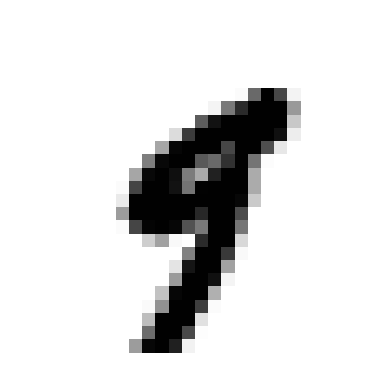

In [ ]:

random = x.iloc[36000]
random = np.array(random)
randoom_image = random.reshape(28,28)
# Using matplotlib
plt.imshow(randoom_image , cmap = matplotlib.cm.binary , interpolation = "nearest")
plt.axis("off")
plt.show()

In [ ]:
#Using Pillow
! pip install Pillow
from PIL import Image as im
data = im.fromarray(( randoom_image* 255).astype(np.uint8))
data.save('Random_number.png')


lets check the Target Value corosponding to it

In [ ]:
y[36000]

'9'

# Training Binary Classifier

Problem : Classify number 5 from dataset

In [ ]:
x_train , x_test , y_train , y_test = x.iloc[:60000] , x.iloc[60000:] ,y.iloc[:60000] , y.iloc[60000:]

In [ ]:
print(f"X train shape : {x_train.shape } \n x Test shape {x_test.shape} \n y Train shape {y_train.shape} \n y Test shape {y_test.shape}")

X train shape : (60000, 784) 
 x Test shape (10000, 784) 
 y Train shape (60000,) 
 y Test shape (10000,)


In [ ]:
shuffle_index = np.random.permutation(60000)
x_train , y_train = x_train.iloc[shuffle_index] , y_train.iloc[shuffle_index]

In [ ]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
43096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


now we will make y_train Binary by assigning all values consiting of 5 to True and other values to False

In [ ]:
y_train.head()

,class
43096,8
52691,0
8211,2
11318,0
22640,0


In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
y_train_5.head()

,class
43096,False
52691,False
8211,False
11318,False
22640,False


In [ ]:
np.unique(y_train_5)

array([False,  True])

In [ ]:
x_test.shape

(10000, 784)

## Model Creation

In [35]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(random_state=42)
model.fit(x_train , y_train_5)

SGDClassifier(random_state=42)

In [36]:
model.predict([random])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [38]:
y_pred = model.predict(x_test)

## Performance measure

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_5 , y_pred)
cm

array([[8869,  239],
       [ 118,  774]])

In [40]:
true_positive = cm[1,1]
false_positive = cm[0,1]
true_negative = cm[0,0]
false_negative = cm[1,0]



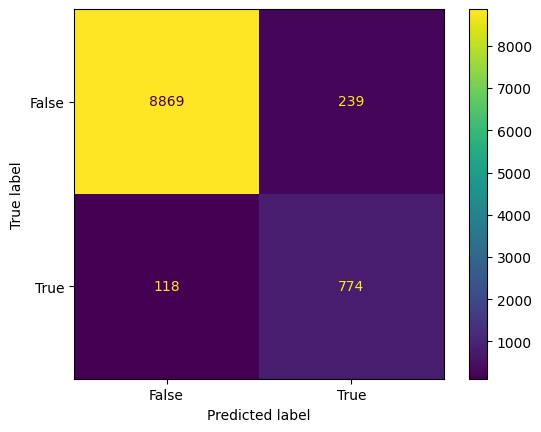

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels = model.classes_)
disp.plot()
plt.show()

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,x_train , y_train_5 , cv = 3 , scoring = 'accuracy')


array([0.9624, 0.9657, 0.9631])

lets find the confusion matrix on cross_val_predict

In [44]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(model , x_train , y_train_5 , cv = 3)
confusion_matrix  (y_train_5 , y_train_pred)

array([[53515,  1064],
       [ 1112,  4309]])